Выберите две особенности в данных из приведенных ниже, сформулируйте для них гипотезы по всем правилам:

● В период Surge видим более низкую price-to-order конверсию

● Для устройств Android наблюдаем более высокие юзерские отмены

● Если Заказ из центра, то видим более низкие юзерские отмены


● Если Comfort & Business классы, то более низкие юзерские отмены, более длинные поездки

Разбейте юзеров на группы с помощью рандома, например, по следующему алгориму:

● Добавьте новую колонку, где каждому юзеру присвойте значение функции RAND() - выдает случайное число от 0 до 1

● В зависимости от значения rand - поместите пользователя в группу 1 или 2. (если rand >0.5, то 1, иначе 2)

Проверьте на однородность с помощью t-теста (встроенной функией excel)
Важно: функция работает только на выборках одинакового размера. Убедитесь что группы 1 и 2 одинаковы по количеству юзеров. Для выравнивания можно исключить некоторое кол-во юзеров в большей группе.



In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import math
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/Netology_A_B-testing_HW_1.csv')
print(df.shape) #количество стр. и столб.
df.info()
# df = df.apply(pd.to_numeric,errors='coerce') #меняем тип данных на числовые
# df.describe().T

(101500, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101500 entries, 0 to 101499
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         101500 non-null  int64  
 1   date               101500 non-null  object 
 2   user_id            101500 non-null  int64  
 3   hour               101500 non-null  int64  
 4   app_opened         101500 non-null  int64  
 5   price_seen         101500 non-null  int64  
 6   order_made         101500 non-null  int64  
 7   surge              91431 non-null   object 
 8   ride_completed     101500 non-null  int64  
 9   user_cancelled     101500 non-null  int64  
 10  age                101500 non-null  int64  
 11  os                 101500 non-null  object 
 12  city_center_order  101500 non-null  int64  
 13  order_class        101500 non-null  object 
 14  distance           91431 non-null   float64
 15  rfm                101500 non-null  ob

In [ ]:
df.head(10).T

In [ ]:
df['surge'] = df['surge'].fillna('no surge')# заменяем NaN на 'no surge' в кол.surge
df.loc[(df.distance > 0), 'order_made'] = 1 # ставим 1 в кол.'order_made', если в кол.distance есть расстояние
df.head(10).T # ОЧИЩЕННЫЙ ДАТАФРЕЙМ !!!

In [ ]:
#отфильтруем df по os=='Android' (сформируем ГС из пользователей с ОС Android )
#получим количество уникальных значений по колонке os
df0 = df[df.os=='Android'] 
df0.os.value_counts()

Android    56696
Name: os, dtype: int64

In [ ]:
# получим среднеквадратичное (стандартное) отклонение
# получим среднее
sigma0 = np.std(df0.order_made) #среднеквадратичное (стандартное) отклонение
m0 = df0.order_made.mean()
print(sigma0,m0)

0.3217052304116487 0.8827606885847326


In [ ]:
# находим сколько поездок было выполнено среди ГС (df0)
# находим конверсию выполненных поездок для владельцев Android - 68%
df_completed = df0[df0.ride_completed==1]
df_completed.ride_completed.value_counts()
print(round((38801/56696)*100,2))

68.44


In [ ]:
# Из онлайн-калькулятора находим, что для базового коэффициента конверсии-68%
# Минимально обнаруживаемый эффекта -5%
# Мощности - 80%
# Уровня значимости - 5%(альфа)
# Минимальный размер выборки - 1381 чел.

In [ ]:
# добавляем кол.randNumCol и заполняем ее случ.знач. : 0 или 1, по строкам df
df0['randNumCol'] = np.random.choice([0, 1], df0.shape[0]) 
df0.randNumCol.value_counts()# уникальные значения по колонке randNumCol

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


1    28410
0    28286
Name: randNumCol, dtype: int64

In [ ]:
#отфильтруем df0 по randNumCol==0,выборка А
dfA = df0[df0.randNumCol==0] 
#отфильтруем df0 по randNumCol==1,выборка B
dfB = df0[df0.randNumCol==1] 
# выбираем нужное количество строк, чтоб выборки А(знач."0") и В(знач."1") были одинаковыми
dfB = dfB.iloc[0:1400] 
dfA = dfA.iloc[1400:2800]
print(dfB.randNumCol.value_counts(),dfA.randNumCol.value_counts(), end='')



1    1400
Name: randNumCol, dtype: int64 0    1400
Name: randNumCol, dtype: int64

In [ ]:
 #находим средние значения в выборках по столбцу order_made
m1, m2 = dfA.order_made.mean(),dfB.order_made.mean()
print(m1,m2, end='')

0.8714285714285714 0.8628571428571429

In [ ]:
scal0 = np.std(dfA.order_made) #среднеквадратичное (стандартное) отклонение выборка А
scal1 = np.std(dfB.order_made) #среднеквадратичное (стандартное) отклонение выборка В
print(scal0,scal1)

0.33472498611028517 0.3439981015609682


In [ ]:
A = dfA[['order_made']]  # выборка А с одним столбцом order_made
B = dfB[['order_made']] # выборка B с одним столбцом order_made
t, p_value = stats.ttest_ind(A, B) #Критерий Стьюдента (t-test)
print(t, p_value)
print(stats.ttest_ind(A, B, equal_var = False))

[0.66794994] [0.50422064]
Ttest_indResult(statistic=array([0.66794994]), pvalue=array([0.50422068]))


*т*.к. Ttest = 0,667 меньше табличного значения 1.960, то статистически значимых различий нет

Выборки однородны



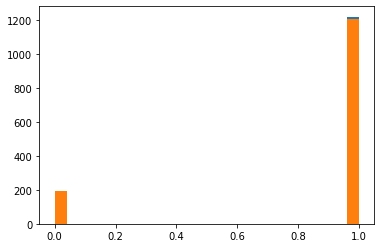

In [ ]:
plt.hist(dfA['order_made'], bins=25);
plt.hist(dfB['order_made'], bins=25);

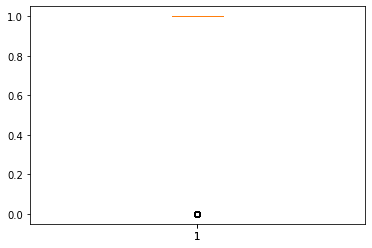

In [ ]:
plt.boxplot(dfA['order_made']);
plt.boxplot(dfB['order_made']);